Assignment 1

Implementing a Deep Neural Neetwork for Linear Regression task of Boston House Price Prediction using the Boston Housing Dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv("BostonHousing.csv")
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
x = df.loc[:, df.columns != 'medv']
y = df.loc[:, df.columns == 'medv']
xtrain, xtest, ytain, ytest = train_test_split(x, y, test_size=0.3, random_state=123) 

In [5]:
mms = MinMaxScaler()
mms.fit(xtrain)
xtrain = mms.transform(xtrain)
xtest = mms.transform(xtest)
xtrain[:5], xtest[:5]

(array([[2.34782498e-03, 2.00000000e-01, 2.38269795e-01, 1.00000000e+00,
         1.50313152e-01, 7.99767622e-01, 4.87234043e-01, 2.91802800e-01,
         8.69565217e-02, 6.87022901e-02, 6.38297872e-01, 9.84542841e-01,
         1.37588652e-01],
        [4.56256121e-04, 2.10000000e-01, 1.89882698e-01, 0.00000000e+00,
         9.81210856e-02, 5.71262587e-01, 1.60638298e-01, 5.15231716e-01,
         1.30434783e-01, 1.06870229e-01, 4.46808511e-01, 1.00000000e+00,
         1.00709220e-01],
        [6.28012552e-04, 0.00000000e+00, 7.33137830e-02, 0.00000000e+00,
         2.00417537e-01, 5.00193648e-01, 5.97872340e-01, 1.30395897e-01,
         8.69565217e-02, 1.14503817e-02, 5.53191489e-01, 1.00000000e+00,
         2.19007092e-01],
        [5.70703456e-02, 0.00000000e+00, 6.46627566e-01, 0.00000000e+00,
         6.70146138e-01, 5.29821844e-01, 9.12765957e-01, 1.09432895e-01,
         1.00000000e+00, 9.14122137e-01, 8.08510638e-01, 9.70220384e-01,
         4.40851064e-01],
        [1.78291606e

In [6]:
model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation="relu", name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(xtrain, ytain, epochs=100, validation_split=0.05, verbose=1)

Epoch 1/100
11/11 [==============================] - 2s 44ms/step - loss: 575.1497 - mae: 22.1262 - val_loss: 588.9922 - val_mae: 22.3101
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 527.5325 - mae: 20.9842 - val_loss: 531.3518 - val_mae: 20.9391
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 459.4337 - mae: 19.1678 - val_loss: 442.2938 - val_mae: 18.5963
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 360.8429 - mae: 16.2381 - val_loss: 320.5779 - val_mae: 14.8311
Epoch 5/100
11/11 [==============================] - 0s 11ms/step - loss: 247.8091 - mae: 12.6381 - val_loss: 199.9523 - val_mae: 10.4889
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 159.4187 - mae: 9.7503 - val_loss: 138.6791 - val_mae: 8.4494
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 130.4897 - mae: 8.9240 - val_loss: 122.2725 - val_mae: 8.1240
Epoch 8/100
11/11 [======================

Epoch 62/100
11/11 [==============================] - 0s 9ms/step - loss: 15.8582 - mae: 2.7000 - val_loss: 33.3765 - val_mae: 3.7007
Epoch 63/100
11/11 [==============================] - 0s 9ms/step - loss: 15.8881 - mae: 2.6541 - val_loss: 32.4432 - val_mae: 3.6742
Epoch 64/100
11/11 [==============================] - 0s 10ms/step - loss: 15.8476 - mae: 2.7372 - val_loss: 33.5623 - val_mae: 3.6862
Epoch 65/100
11/11 [==============================] - 0s 9ms/step - loss: 15.6543 - mae: 2.6481 - val_loss: 32.0043 - val_mae: 3.6386
Epoch 66/100
11/11 [==============================] - 0s 9ms/step - loss: 15.6174 - mae: 2.7178 - val_loss: 31.6469 - val_mae: 3.6136
Epoch 67/100
11/11 [==============================] - 0s 10ms/step - loss: 15.2605 - mae: 2.6408 - val_loss: 33.7078 - val_mae: 3.6703
Epoch 68/100
11/11 [==============================] - 0s 9ms/step - loss: 15.5185 - mae: 2.6582 - val_loss: 31.4099 - val_mae: 3.6120
Epoch 69/100
11/11 [==============================] - 0s 9ms

In [8]:
mse_nn, mae_nn = model.evaluate(xtest, ytest)
print("Mean Squarred Error(test data) :", mse_nn)
print("Mean Absolute Error(test data) :", mae_nn)


5/5 [==============================] - 0s 3ms/step - loss: 22.4194 - mae: 3.1271
Mean Squarred Error(test data) : 22.4194393157959
Mean Absolute Error(test data) : 3.1271448135375977


<Axes: title={'center': 'loss Curves'}, xlabel='Epochs', ylabel='Loss'>

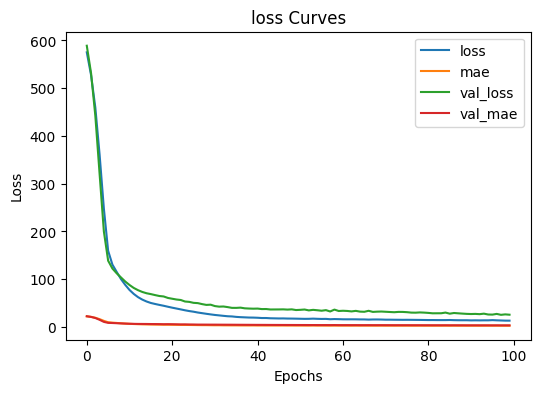

In [9]:
pd.DataFrame(history.history).plot(figsize=(6,4), xlabel="Epochs", ylabel="Loss", title="loss Curves")

In [10]:
y_pred = model.predict(xtest)
y_pred[0]

5/5 [==============================] - 0s 3ms/step


array([13.917301], dtype=float32)

In [11]:
# 📌 Step 1: Required Libraries


# 📌 Step 2: Load Dataset
df = pd.read_csv("BostonHousing.csv")  # Make sure this CSV file is in your directory
print(df.head())

# 📌 Step 3: Split Features (X) and Target (y)
X = df.drop("medv", axis=1)   # medv is the price column
y = df["medv"]

# 📌 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 📌 Step 5: Normalize Input Features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 Step 6: Build a Simple Neural Network for Linear Regression
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer for regression

# 📌 Step 7: Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Regression: MSE & MAE

# 📌 Step 8: Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

# 📌 Step 9: Evaluate the Model
loss, mae = model.evaluate(X_test, y_test)
print(f"\nTest Mean Absolute Error (MAE): {mae:.2f}")

# 📌 Optional: Predicting on New Data
predictions = model.predict(X_test[:5])
print("\nPredicted prices:", predictions.flatten())
print("Actual prices:", y_test[:5].values)


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Epoch 1/100
29/29 [==============================] - 1s 14ms/step - loss: 601.1797 - mae: 22.5255 - val_loss: 541.2510 - val_mae: 21.6806
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 557.7970 - mae: 21.4586 - val_loss: 492.1536 - val_mae: 20.4756
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 500.8887 - mae: 20.03

29/29 [==============================] - 0s 6ms/step - loss: 31.3149 - mae: 4.0700 - val_loss: 31.4053 - val_mae: 3.8031
Epoch 58/100
29/29 [==============================] - 0s 5ms/step - loss: 30.8934 - mae: 4.0588 - val_loss: 31.0338 - val_mae: 3.7801
Epoch 59/100
29/29 [==============================] - 0s 5ms/step - loss: 30.5052 - mae: 3.9952 - val_loss: 31.0116 - val_mae: 3.7458
Epoch 60/100
29/29 [==============================] - 0s 6ms/step - loss: 30.0719 - mae: 3.9879 - val_loss: 30.6716 - val_mae: 3.7678
Epoch 61/100
29/29 [==============================] - 0s 6ms/step - loss: 29.6762 - mae: 3.9477 - val_loss: 30.5086 - val_mae: 3.7031
Epoch 62/100
29/29 [==============================] - 0s 6ms/step - loss: 29.2565 - mae: 3.9314 - val_loss: 30.4822 - val_mae: 3.7625
Epoch 63/100
29/29 [==============================] - 0s 5ms/step - loss: 29.0409 - mae: 3.9372 - val_loss: 30.1642 - val_mae: 3.7020
Epoch 64/100
29/29 [==============================] - 0s 6ms/step - loss: 2

5/5 [==============================] - 0s 3ms/step


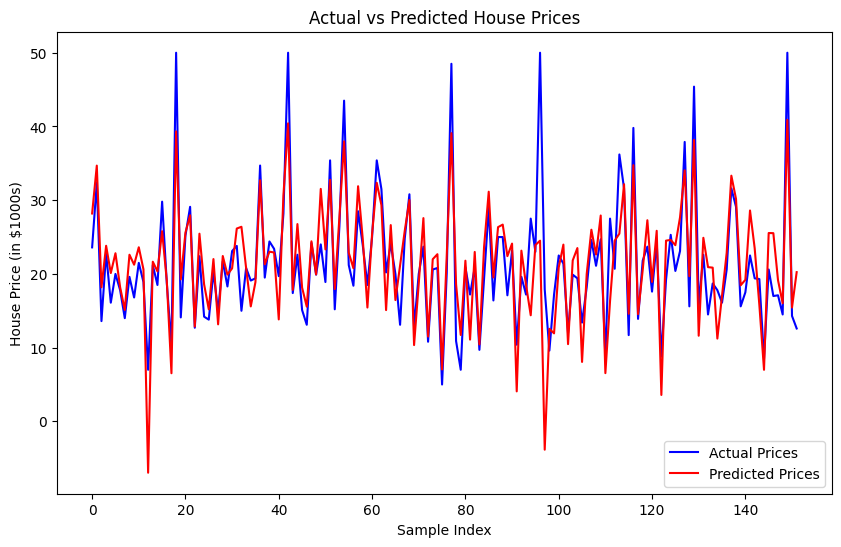

In [12]:
import matplotlib.pyplot as plt

# 📌 Predict on test data
y_pred = model.predict(X_test).flatten()  # Flatten to convert to 1D array

# 📊 Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Sample Index")
plt.ylabel("House Price (in $1000s)")
plt.legend()
# plt.grid(True)
plt.show()


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [14]:
df=pd.read_csv("BostonHousing.csv")

In [15]:
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [16]:
X=df.drop('medv' ,axis=1)
Y=df['medv']

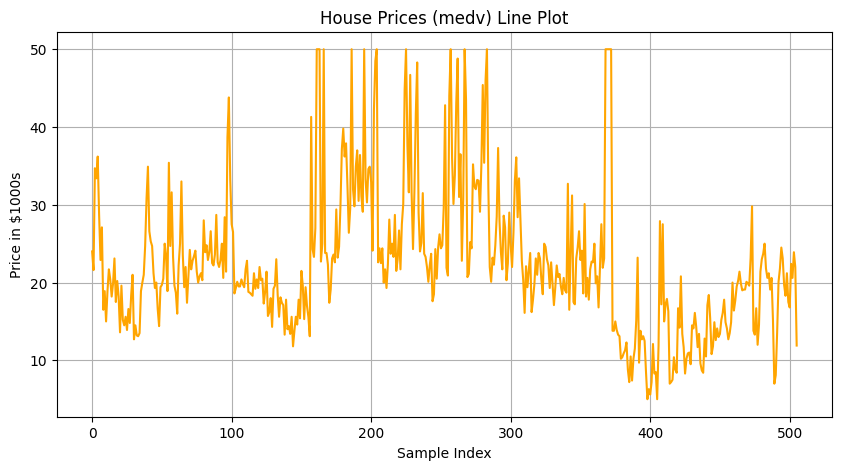

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['medv'], color='orange')
plt.title('House Prices (medv) Line Plot')
plt.xlabel('Sample Index')
plt.ylabel('Price in $1000s')
plt.grid(True)
plt.show()


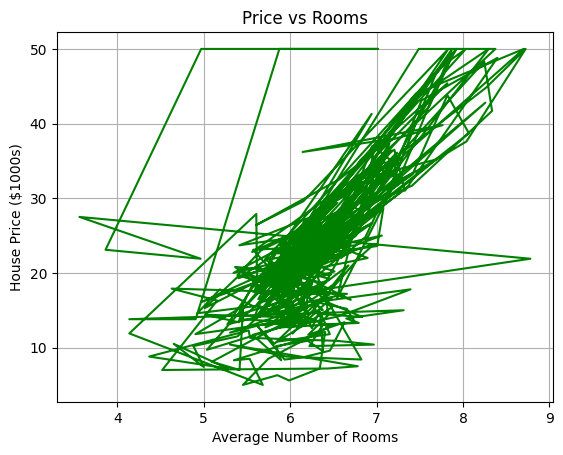

In [18]:
plt.plot(df["rm"], df["medv"], color="green")  # Avg rooms vs Price
plt.xlabel("Average Number of Rooms")
plt.ylabel("House Price ($1000s)")
plt.title("Price vs Rooms")
plt.grid(True)
plt.show()


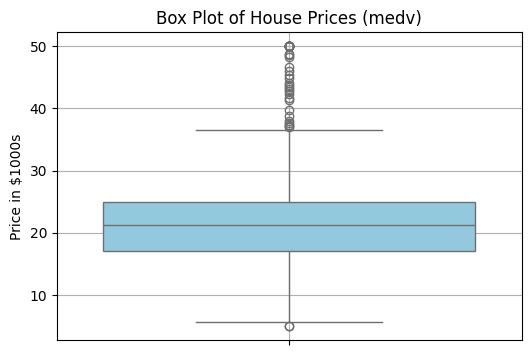

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['medv'], color='skyblue')
plt.title('Box Plot of House Prices (medv)')
plt.ylabel('Price in $1000s')
plt.grid(True)
plt.show()


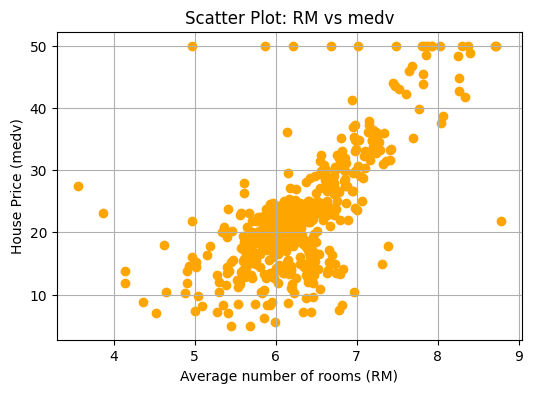

In [20]:
plt.figure(figsize=(6, 4))
plt.scatter(df['rm'], df['medv'], color='orange')
plt.xlabel('Average number of rooms (RM)')
plt.ylabel('House Price (medv)')
plt.title('Scatter Plot: RM vs medv')
plt.grid(True)
plt.show()


In [21]:
X_train,X_test ,Y_train,Y_test=train_test_split(X,Y ,test_size=0.3 ,random_state=42)

In [22]:
scaler=MinMaxScaler()

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  # ✔️ Transform data
X_test = scaler.transform(X_test)


In [24]:
X_test=scaler.transform(X_test)

C:\Users\karan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [25]:
model=Sequential()

In [26]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='linear'))


In [27]:
model.compile(optimizer='adam' ,loss='mse' ,metrics=['mse'])

In [30]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)


Epoch 1/100
29/29 [==============================] - 0s 8ms/step - loss: 21.9829 - mse: 21.9829 - val_loss: 25.5098 - val_mse: 25.5098
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 21.7834 - mse: 21.7834 - val_loss: 25.8452 - val_mse: 25.8452
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 21.5316 - mse: 21.5316 - val_loss: 26.0333 - val_mse: 26.0333
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 21.7531 - mse: 21.7531 - val_loss: 25.7701 - val_mse: 25.7701
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 21.7342 - mse: 21.7342 - val_loss: 25.7248 - val_mse: 25.7248
Epoch 6/100
29/29 [==============================] - 0s 6ms/step - loss: 21.4585 - mse: 21.4585 - val_loss: 25.8142 - val_mse: 25.8142
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 21.3514 - mse: 21.3514 - val_loss: 25.9900 - val_mse: 25.9900
Epoch 8/100
29/29 [==============================] - 0s

29/29 [==============================] - 0s 6ms/step - loss: 19.7697 - mse: 19.7697 - val_loss: 24.8855 - val_mse: 24.8855
Epoch 62/100
29/29 [==============================] - 0s 6ms/step - loss: 19.9526 - mse: 19.9526 - val_loss: 25.1688 - val_mse: 25.1688
Epoch 63/100
29/29 [==============================] - 0s 5ms/step - loss: 19.6185 - mse: 19.6185 - val_loss: 25.1762 - val_mse: 25.1762
Epoch 64/100
29/29 [==============================] - 0s 6ms/step - loss: 19.5688 - mse: 19.5688 - val_loss: 25.5411 - val_mse: 25.5411
Epoch 65/100
29/29 [==============================] - 0s 6ms/step - loss: 19.6031 - mse: 19.6031 - val_loss: 24.8562 - val_mse: 24.8562
Epoch 66/100
29/29 [==============================] - 0s 6ms/step - loss: 19.6097 - mse: 19.6097 - val_loss: 25.0863 - val_mse: 25.0863
Epoch 67/100
29/29 [==============================] - 0s 6ms/step - loss: 19.5994 - mse: 19.5994 - val_loss: 24.8368 - val_mse: 24.8368
Epoch 68/100
29/29 [==============================] - 0s 6ms/

In [31]:
loss, mae = model.evaluate(X_test, y_test)
print(f"\nTest Mean Absolute Error (MAE): {mae:.2f}")

# 📌 Optional: Predicting on New Data
predictions = model.predict(X_test[:5])
print("\nPredicted prices:", predictions.flatten())
print("Actual prices:", y_test[:5].values)

5/5 [==============================] - 0s 4ms/step - loss: 265.5263 - mse: 265.5263

Test Mean Absolute Error (MAE): 265.53
1/1 [==============================] - 0s 42ms/step

Predicted prices: [ 7.530641  11.94318    5.738687   8.29279    5.1911836]
Actual prices: [23.6 32.4 13.6 22.8 16.1]


In [33]:
# 📌 Step 1: Required Libraries


# 📌 Step 2: Load Dataset
df = pd.read_csv("BostonHousing.csv")  # Make sure this CSV file is in your directory
print(df.head())

# 📌 Step 3: Split Features (X) and Target (y)
X = df.drop("medv", axis=1)   # medv is the price column
y = df["medv"]

# 📌 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 📌 Step 5: Normalize Input Features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 Step 6: Build a Simple Neural Network for Linear Regression
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


# 📌 Step 7: Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Regression: MSE & MAE

# 📌 Step 8: Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# 📌 Step 9: Evaluate the Model
loss, mae = model.evaluate(X_test, y_test)
print(f"\nTest Mean Absolute Error (MAE): {mae:.2f}")

# 📌 Optional: Predicting on New Data
predictions = model.predict(X_test[:5])
print("\nPredicted prices:", predictions.flatten())
print("Actual prices:", y_test[:5].values)


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Epoch 1/100
9/9 [==============================] - 2s 43ms/step - loss: 613.2974 - mae: 22.8444 - val_loss: 556.9578 - val_mae: 22.0834
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 576.0096 - mae: 22.0036 - val_loss: 514.5654 - val_mae: 21.0946
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 526.5881 - mae: 20.7970 -

Epoch 58/100
9/9 [==============================] - 0s 12ms/step - loss: 19.9661 - mae: 3.1560 - val_loss: 26.1240 - val_mae: 3.2064
Epoch 59/100
9/9 [==============================] - 0s 11ms/step - loss: 19.8653 - mae: 3.1414 - val_loss: 26.1114 - val_mae: 3.2289
Epoch 60/100
9/9 [==============================] - 0s 11ms/step - loss: 19.7295 - mae: 3.1171 - val_loss: 25.7805 - val_mae: 3.2040
Epoch 61/100
9/9 [==============================] - 0s 11ms/step - loss: 19.4956 - mae: 3.1097 - val_loss: 25.8285 - val_mae: 3.2083
Epoch 62/100
9/9 [==============================] - 0s 11ms/step - loss: 19.2637 - mae: 3.0923 - val_loss: 25.6320 - val_mae: 3.1308
Epoch 63/100
9/9 [==============================] - 0s 11ms/step - loss: 19.1875 - mae: 3.0601 - val_loss: 25.7119 - val_mae: 3.1603
Epoch 64/100
9/9 [==============================] - 0s 11ms/step - loss: 19.1852 - mae: 3.0842 - val_loss: 25.7217 - val_mae: 3.1687
Epoch 65/100
9/9 [==============================] - 0s 11ms/step - lo

In [34]:
import matplotlib.pyplot as plt

In [36]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0, 0.5, 'prices')

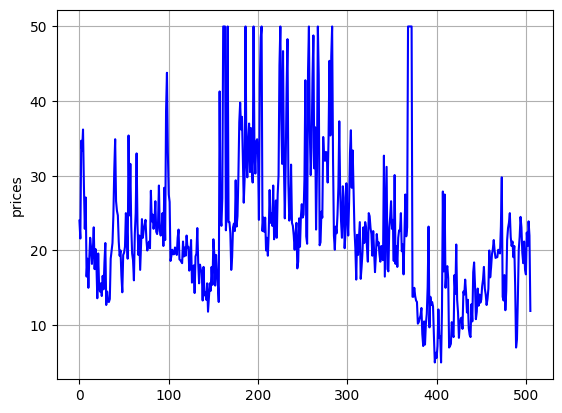

In [42]:
plt.plot(df['medv'],color='blue')
plt.grid('true')
plt.ylabel("prices")